# Analisis de Datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
formatter = EngFormatter(places=0, sep=u"\N{THIN SPACE}")  # U+2009


## Cargar Datos

In [2]:
import datetime
import pandas as pd

def leer_data():
    outfile='./data/consulta.csv'
    data = pd.read_csv(outfile)
    return data

data = leer_data()
print('Done')

Done


In [3]:
data.head()

,client_id,date,año,mes,dia,hora,merchant_departement,merchant_province,merchant_district,mcc,mccg,quantity,amount_sol
0,+++g8j9k+5A=,2016-09-27 01:37:23,2016,9,27,1,LIMA,LIMA,San Juan De Miraflor,5912,15,1,107.0
1,+++g8j9k+5A=,2016-06-24 03:35:00,2016,6,24,3,LIMA,LIMA,Magdalena Del Mar,5912,15,1,58.0
2,+++g8j9k+5A=,2017-04-29 03:15:16,2017,4,29,3,LIMA,LIMA,Miraflores,6300,17,1,153.0
3,+++g8j9k+5A=,2017-03-01 05:47:02,2017,3,1,5,LIMA,LIMA,Miraflores,6300,17,1,110.0
4,+++g8j9k+5A=,2016-06-24 03:36:43,2016,6,24,3,LIMA,LIMA,Magdalena Del Mar,5912,15,1,47.0


In [4]:
temp = data

In [5]:
temp['date'] = pd.to_datetime(temp['date'])
temp['dia_semana'] = temp['date'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
temp['dia_semana'] = temp['dia_semana'].apply(lambda x: days[x])

In [6]:
days = {0:'1-Madrugada',1:'1-Madrugada',2:'1-Madrugada',3:'1-Madrugada',4:'1-Madrugada',5:'1-Madrugada',
        6:'2-Mañana',7:'2-Mañana',8:'2-Mañana',9:'2-Mañana',10:'2-Mañana',11:'2-Mañana',
        12:'3-Tarde',13:'3-Tarde',14:'3-Tarde',15:'3-Tarde',16:'3-Tarde',17:'3-Tarde',
        18:'4-Noche',19:'4-Noche',20:'4-Noche',21:'4-Noche',22:'4-Noche',23:'4-Noche'}
temp['turno'] = temp['hora'].apply(lambda x: days[x])

In [7]:
data =  temp
data.head(3)

,client_id,date,año,mes,dia,hora,merchant_departement,merchant_province,merchant_district,mcc,mccg,quantity,amount_sol,dia_semana,turno
0,+++g8j9k+5A=,2016-09-27 01:37:23,2016,9,27,1,LIMA,LIMA,San Juan De Miraflor,5912,15,1,107.0,Tues,1-Madrugada
1,+++g8j9k+5A=,2016-06-24 03:35:00,2016,6,24,3,LIMA,LIMA,Magdalena Del Mar,5912,15,1,58.0,Fri,1-Madrugada
2,+++g8j9k+5A=,2017-04-29 03:15:16,2017,4,29,3,LIMA,LIMA,Miraflores,6300,17,1,153.0,Sat,1-Madrugada


In [8]:
y = list(data.groupby(['merchant_district']).sum()['amount_sol'])
x = list(data.groupby(['merchant_district']).sum()['amount_sol'] .index)
x[y.index(min(y))]

'Santa Rosa'

0 :   27628.0       Ancon
1 :   3845829.0       Ate
2 :   3024004.0       Barranco
3 :   994718.0       Brena
4 :   105234.0       Carabayllo
5 :   177315.0       Chaclacayo
6 :   3150045.0       Chorrillos
7 :   145210.0       Cieneguilla
8 :   751819.0       Comas
9 :   380010.0       El Agustino
10 :   2849031.0       Independencia
11 :   2615690.0       Jesus Maria
12 :   3555375.0       La Molina
13 :   2983241.0       La Victoria
14 :   7018287.0       Lima
15 :   1736091.0       Lince
16 :   1209661.0       Los Olivos
17 :   263208.0       Lurigancho
18 :   705419.0       Lurin
19 :   9371582.0       Magdalena Del Mar
20 :   68623670.0       Miraflores
21 :   7435907.0       PUEBLO LIBRE
22 :   633427.0       Pachacamac
23 :   52061.0       Pucusana
24 :   1441089.0       Puente Piedra
25 :   368044.0       Punta Hermosa
26 :   228879.0       Punta Negra
27 :   2014744.0       Rimac
28 :   74055.0       San Bartolo
29 :   22708189.0       San Borja
30 :   29702927.0       San Is

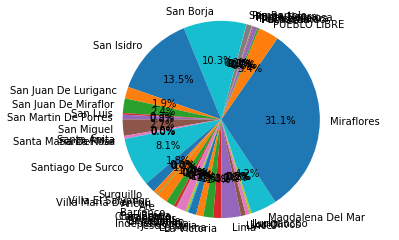

In [9]:
y = list(data.groupby(['merchant_district']).sum()['amount_sol'])
x = list(data.groupby(['merchant_district']).sum()['amount_sol'] .index)
plt.pie(y, labels=x, autopct='%1.1f%%', shadow=False, startangle=230)
plt.axis('equal') 
for i in range(len(y)):
    print(i,':  ',y[i],'     ',x[i])

In [10]:
data = data.loc[data['merchant_district']=='Lurigancho']
data.head(3)

,client_id,date,año,mes,dia,hora,merchant_departement,merchant_province,merchant_district,mcc,mccg,quantity,amount_sol,dia_semana,turno
4596,++NjorN1iZY=,2017-01-31 22:24:40,2017,1,31,22,LIMA,LIMA,Lurigancho,7995,19,1,100.0,Tues,4-Noche
4597,++NjorN1iZY=,2016-07-31 19:35:21,2016,7,31,19,LIMA,LIMA,Lurigancho,7995,19,1,100.0,Sun,4-Noche
4598,++NjorN1iZY=,2016-12-03 19:44:42,2016,12,3,19,LIMA,LIMA,Lurigancho,7995,19,1,100.0,Sat,4-Noche


## Graficos

### Comportamiento de Gastos totales por meses

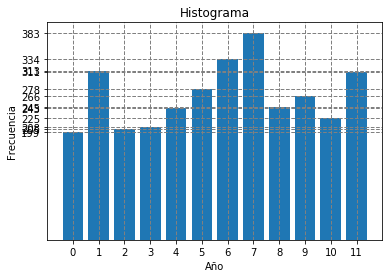

,año,mes,client_id
0,2016,6,199
1,2016,7,313
2,2016,8,205
3,2016,9,208
4,2016,10,243
5,2016,11,278
6,2016,12,334
7,2017,1,383
8,2017,2,245
9,2017,3,266


In [11]:
# Grafico por Meses - Cantidad

nn= data.groupby(['año','mes'], as_index=False, sort=True)['client_id'].count()

fig, ax = plt.subplots()
ax.bar(nn.index, nn['client_id'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(nn.index)

ax.set_ylabel('Frecuencia')
ax.set_yticks(nn['client_id'])
ax.set_title('Histograma')
plt.show()
nn

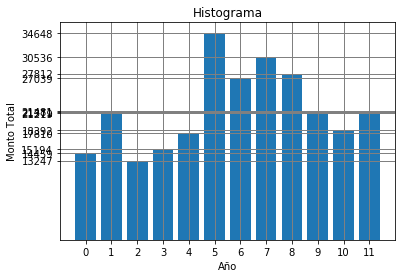

,año,mes,amount_sol
0,2016,6,14459.0
1,2016,7,21219.0
2,2016,8,13247.0
3,2016,9,15194.0
4,2016,10,17810.0
5,2016,11,34648.0
6,2016,12,27039.0
7,2017,1,30536.0
8,2017,2,27812.0
9,2017,3,21481.0


In [12]:
# Grafico por Meses - Montos 

nn= data.groupby(['año','mes'], as_index=False, sort=True)['amount_sol'].sum()

fig, ax = plt.subplots()
ax.bar(nn.index, nn['amount_sol'], align='center')
ax.grid(color='gray', linestyle='-', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(nn.index)

ax.set_ylabel('Monto Total')
ax.set_yticks(nn['amount_sol'])
ax.set_title('Histograma')
plt.show()
nn

In [13]:
data.head(3)

,client_id,date,año,mes,dia,hora,merchant_departement,merchant_province,merchant_district,mcc,mccg,quantity,amount_sol,dia_semana,turno
4596,++NjorN1iZY=,2017-01-31 22:24:40,2017,1,31,22,LIMA,LIMA,Lurigancho,7995,19,1,100.0,Tues,4-Noche
4597,++NjorN1iZY=,2016-07-31 19:35:21,2016,7,31,19,LIMA,LIMA,Lurigancho,7995,19,1,100.0,Sun,4-Noche
4598,++NjorN1iZY=,2016-12-03 19:44:42,2016,12,3,19,LIMA,LIMA,Lurigancho,7995,19,1,100.0,Sat,4-Noche


### Distribucion de Soles

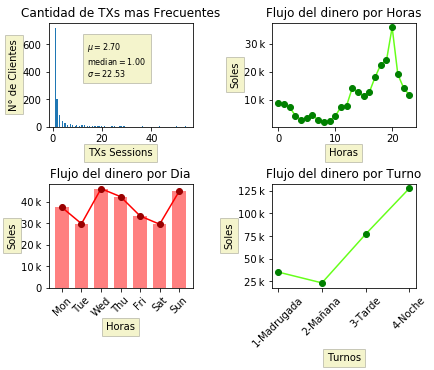

In [14]:
box = dict(facecolor='#cccc00', pad=4, alpha=0.2)
fig, axes = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = axes.flatten()
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.55, wspace=0.55)


ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)
y = data.groupby(['client_id']).count()      # Us por cliente
y = y["mcc"].tolist()
mu = np.mean(y)
median = np.median(y)
sigma = np.var(y)
text = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$' % (mu, median, sigma)
ax1.hist(y,100)
ax1.set_title('Cantidad de TXs mas Frecuentes')
ax1.set_xlabel('TXs Sessions', bbox=box)
ax1.set_ylabel('N° de Clientes', bbox=box)
ax1.text(0.27, 0.85, text, transform=ax1.transAxes, fontsize=8, verticalalignment='top', bbox=box)


ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
y = list(data.groupby(['hora']).sum()['amount_sol'])
x = range(len(y))
ax2.plot(x,y,'-',color='#66ff1a')
ax2.plot(x,y,'ob',color='green')
ax2.set_title('Flujo del dinero por Horas')
ax2.set_xlabel('Horas', bbox=box)
ax2.set_ylabel('Soles', bbox=box)


y = data.groupby(['dia_semana']).sum()['amount_sol']
x = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax3.yaxis.set_major_formatter(formatter)
ax3.set_xticklabels(x, rotation=45)
ax3.bar(x,y,0.7,color='#ff8080')
ax3.plot(x,y,'-',color='#ff0000')
ax3.plot(x,y,'ob',color='#990000')
ax3.set_title('Flujo del dinero por Dia')
ax3.set_xlabel('Horas', bbox=box)
ax3.set_ylabel('Soles', bbox=box)


y = list(data.groupby(['turno']).sum()['amount_sol'])
x = list(data.groupby(['turno']).sum()['amount_sol'] .index)
ax4.yaxis.set_major_formatter(formatter)
ax4.set_xticklabels(x, rotation=45)
ax4.plot(x,y,'-',color='#66ff1a')
ax4.plot(x,y,'ob',color='green')
ax4.set_title('Flujo del dinero por Turno')
ax4.set_xlabel('Turnos', bbox=box)
ax4.set_ylabel('Soles', bbox=box)


plt.savefig("imagen.png",dpi = 1000)

### Distribucion de Cantidades de TXs

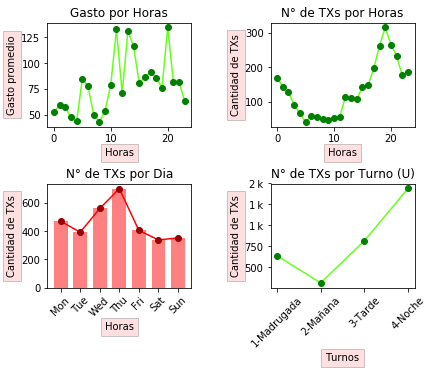

In [15]:
box = dict(facecolor='#ff6666', pad=4, alpha=0.2)
fig, axes = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = axes.flatten()
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.55, wspace=0.55)

"""
y = list(data.groupby(['merchant_district']).sum()['amount_sol'])
x = list(data.groupby(['merchant_district']).sum()['amount_sol'] .index)
ax1.pie(y, labels=x, autopct='%1.1f%%', shadow=False, startangle=230)
ax1.axis('equal') 
"""
ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)
y = list(data.groupby(['hora']).mean()['amount_sol'])
y_max = list(data.groupby(['hora']).max()['amount_sol'])
x = range(len(y))
# ax1.plot(x,y_max,'-',color='#66ff1a')
ax1.plot(x,y,'-',color='#66ff1a')
ax1.plot(x,y,'ob',color='green')
ax1.set_title('Gasto por Horas')
ax1.set_xlabel('Horas', bbox=box)
ax1.set_ylabel('Gasto promedio', bbox=box)


ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
y = list(data.groupby(['hora']).count()['quantity'])
x = range(len(y))
ax2.plot(x,y,'-',color='#66ff1a')
ax2.plot(x,y,'ob',color='green')
ax2.set_title('N° de TXs por Horas')
ax2.set_xlabel('Horas', bbox=box)
ax2.set_ylabel('Cantidad de TXs', bbox=box)


y = data.groupby(['dia_semana']).count()['quantity']
x = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax3.yaxis.set_major_formatter(formatter)
ax3.set_xticklabels(x, rotation=45)
ax3.bar(x,y,0.7,color='#ff8080')
ax3.plot(x,y,'-',color='#ff0000')
ax3.plot(x,y,'ob',color='#990000')
ax3.set_title('N° de TXs por Dia')
ax3.set_xlabel('Horas', bbox=box)
ax3.set_ylabel('Cantidad de TXs', bbox=box)


y = list(data.groupby(['turno']).count()['quantity'])
x = list(data.groupby(['turno']).count()['quantity'] .index)
ax4.yaxis.set_major_formatter(formatter)
ax4.set_xticklabels(x, rotation=45)
ax4.plot(x,y,'-',color='#66ff1a')
ax4.plot(x,y,'ob',color='green')
ax4.set_title('N° de TXs por Turno (U)')
ax4.set_xlabel('Turnos', bbox=box)
ax4.set_ylabel('Cantidad de TXs', bbox=box)


plt.savefig("imagen.png",dpi = 1000)